In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [9]:
iris = load_iris()
colors = ["blue", "red", "green"]
df = DataFrame(
    data=np.c_[iris["data"], iris["target"]], columns=iris["feature_names"] + ["target"]
)
target_mapping = {
    0: iris["target_names"][0],
    1: iris["target_names"][1],
    2: iris["target_names"][2],
}
df["target"] = df["target"].map(target_mapping)
X = df[iris["feature_names"]].to_numpy()
labels = df[["target"]].to_numpy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe9c5b1cd0>,
      dtype=object)

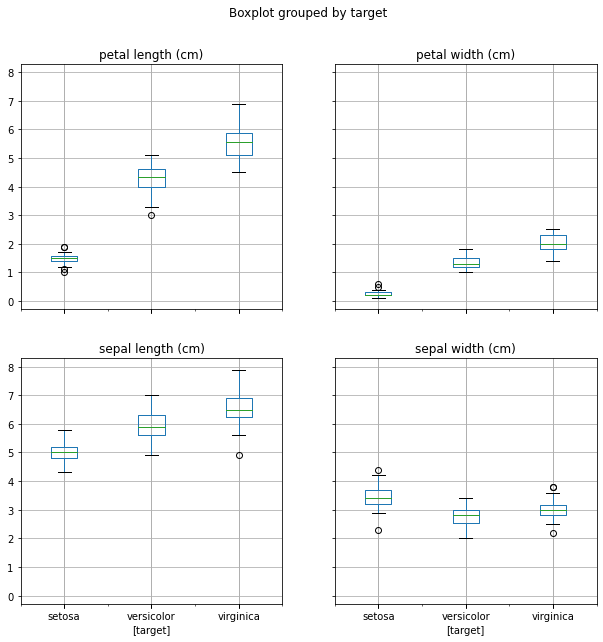

In [10]:
df.boxplot(by="target", layout=(2, 2), figsize=(10, 10))


### Standardize the data


In [11]:
X = StandardScaler().fit_transform(X)


### Computing the covariance matrix


Covariance measures how two features vary with each other. A positive covariance indicates that features increase and decrease together. Whereas, a negative covariance indicates that the two features vary in the opposite directions.

In [12]:
cov = (X.T @ X) / (X.shape[0] - 1)

### Performing eigendecomposition

The eigenvectors represent the principal components (the directions of maximum variance) of the covariance matrix. The eigenvalues are their corresponding magnitude. The eigenvector that has the largest corresponding eigenvalue represents the direction of maximum variance

In [15]:
eig_values, eig_vectors = np.linalg.eig(cov)


### Determine which principal components to select


In [16]:
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]

(1.0, 4.0)

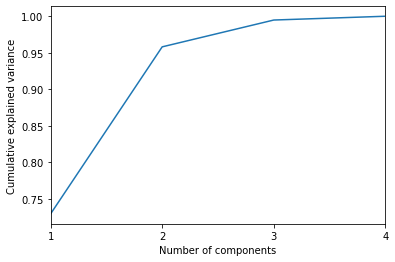

In [17]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [18]:
eig_scores = np.dot(X, sorted_eig_vectors[:, :2])


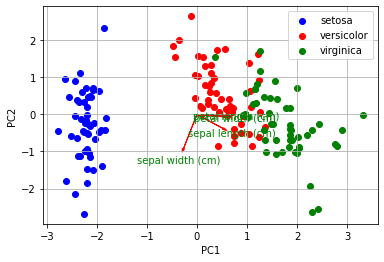

In [21]:
def biplot(score, coeff, labels):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    for i, u in enumerate(iris["target_names"]):
        xi = [
            score[j, 0] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        yi = [
            score[j, 1] for j in range(score.shape[0]) if df["target"].tolist()[j] == u
        ]
        plt.scatter(xi, yi, c=colors[i], label=u)
    for i in range(n):
        plt.arrow(
            0, 0, coeff[i, 0], coeff[i, 1], color="r", head_width=0.05, head_length=0.1
        )
        plt.text(
            coeff[i, 0] * 1.35,
            coeff[i, 1] * 1.35,
            labels[i],
            color="g",
            ha="center",
            va="center",
        )


plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

biplot(eig_scores, sorted_eig_vectors, iris["feature_names"])
plt.legend()

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [49]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [50]:
principalComponents_iris = pca.fit_transform(X)

In [51]:
principal_iris_Df = pd.DataFrame(data = principalComponents_iris
             , columns = ['principal component 1', 'principal component 2'])
principal_iris_Df['y'] = labels

In [52]:
principal_iris_Df.head()

,principal component 1,principal component 2,y
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


In [53]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.72962445 0.22850762]


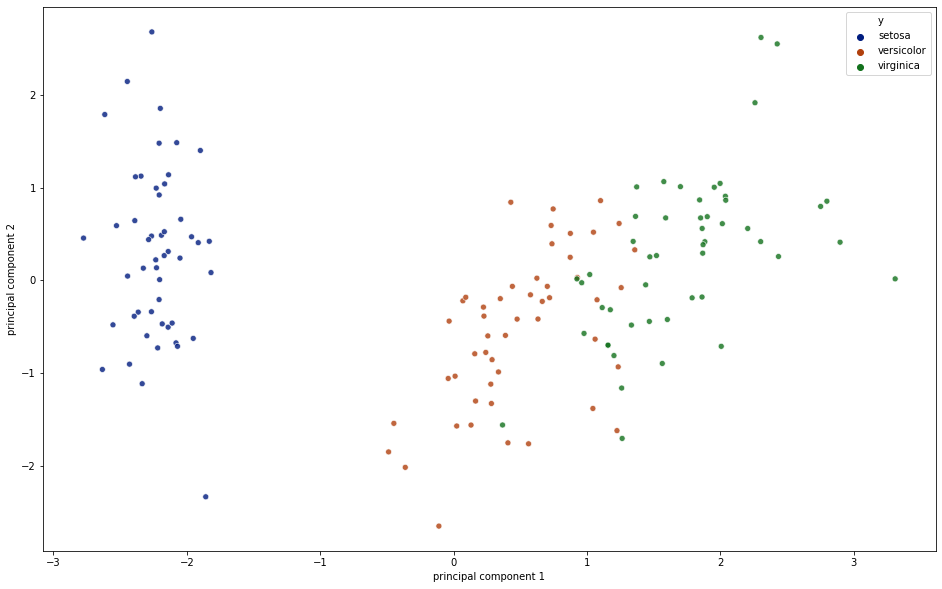

In [54]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("dark",3),
    data=principal_iris_Df,
    legend="full",
    alpha=0.8
)